In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import os 
import sys
import cv2

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
import open3d_tutorial as o3dtut

In [3]:
o3dtut.interactive = not "CI" in os.environ

In [4]:
# sys.path.append(r'Open3D-master\examples\python')

In [5]:
img2 = cv2.imread('depthImg2.png')
img2.shape

(400, 600, 3)

In [6]:
# img1 = cv2.imread(r'depthImg.jpg')
# img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
# img1 = cv2.resize(img1,(600,400))
# cv2.imwrite('depthImg2.png',img1)

In [7]:
# img1 = cv2.imread(r'colorImg.jpg')
# img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
# img1 = cv2.resize(img1,(600,400))
# cv2.imwrite('colorImg2.png',img1)

In [8]:
print("Read Redwood Dataset")
color_raw = o3d.io.read_image('colorImg.jpg')
depth_raw = o3d.io.read_image('depthImg2.png')
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw,depth_raw)
print(rgbd_image)

Read Redwood Dataset
RGBDImage of size 
Color image : 600x400, with 1 channels.
Depth image : 600x400, with 1 channels.
Use numpy.asarray to access buffer data.


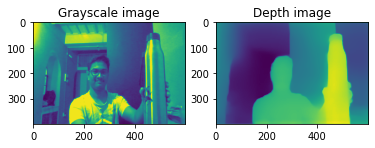

In [9]:
# Plot the images
plt.subplot(1, 2, 1)
plt.title('Grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [10]:
# Camera intrinsic parameters built into Open3D for Prime Sense
camera_intrinsic = o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)

In [11]:
# Create the point cloud from images and camera intrisic parameters
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, camera_intrinsic)
    
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd], zoom=0.5)

TypeError: draw_geometries(): incompatible function arguments. The following argument types are supported:
    1. (geometry_list: List[open3d.cpu.pybind.geometry.Geometry], window_name: str = 'Open3D', width: int = 1920, height: int = 1080, left: int = 50, top: int = 50, point_show_normal: bool = False, mesh_show_wireframe: bool = False, mesh_show_back_face: bool = False) -> None
    2. (geometry_list: List[open3d.cpu.pybind.geometry.Geometry], window_name: str = 'Open3D', width: int = 1920, height: int = 1080, left: int = 50, top: int = 50, point_show_normal: bool = False, mesh_show_wireframe: bool = False, mesh_show_back_face: bool = False, lookat: numpy.ndarray[numpy.float64[3, 1]], up: numpy.ndarray[numpy.float64[3, 1]], front: numpy.ndarray[numpy.float64[3, 1]], zoom: float) -> None

Invoked with: [PointCloud with 239155 points.]; kwargs: zoom=0.5